# Streaming Synergistic Forest Tutorial
**Note:** This is an experimental feature and requires a modified fork of `scikit-learn` with added `partial_fit` functionality: [scikit-learn-stream fork](https://github.com/PSSF23/scikit-learn-stream). Additionally, this notebook uses external functions stored in `tutorials/functions/streaming_forest_functions.py`

In [10]:
from functions import streaming_xor_functions as fn
import numpy as np 
import matplotlib.pyplot as plt 

## Using the `update_task` function for streaming data
Current standard implementations of decision forests operate in batch mode. In many real world applications, we are not provided with all data at once and therefore need to incrementally update as data arrives. For incrementally updating decision trees we can use the [scikit-learn-stream fork](https://github.com/PSSF23/scikit-learn-stream) with an added `partial_fit` function for incremental learning. Furthermore, for synergistic learning we can use the function `update_task`. When new data, $x$, arrives with labels, $y$, we can update task $t$ as follows:

`synf.update_task(x,y,task_id = t)`

Note that when using `update_task`, the `classes` argument must be provided on the initial call to `add_task`

## Synergistic Learning

The goal of synergistic learning is to improve performance on the current task as well as past and future tasks. This can be accomplished through ensembling independent representations, as is done in both Synergistic Forest implementations. 

The metric of learning efficiency, as described in Vogelstein et al. 2020, can be used to quantify a classifier's learning abilities. 

The **learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{LE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^t_n))]}{\mathbb{E}[R^t(f(\mathbf{S}_n))]}$$
If $\text{LE}^t_n(f) > 1$, $f$ has learned task $t$ with data $\mathbf{S}_n$

The **forward learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{FLE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^t_n))]}{\mathbb{E}[R^t(f(\mathbf{S}^{\leq t}_n))]}$$

If $\text{FLE}^t_n(f) > 1$, $f$ has leveraged data from past tasks to improve performance on task $t$

The **backward learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{BLE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^{\leq t}_n))]}{\mathbb{E}[R^t(f(\mathbf{S}_n))]}$$
If $\text{BLE}^t_n(f) > 1$, $f$ has leveraged data from future tasks to improve performance on previous tasks

An algorithm has **synergistically learned** if $\log\text{LE}^t_n(f) > 0$ for all $t \in \mathcal{T}$ 

Conversely, an algorithm has **catastrophically forgotten** if it has negatively learned for all tasks

## Gaussian XOR Experiments

In [11]:
mc_rep = 25
rxor_results, xnor_results = fn.run_gaussian_experiments(mc_rep)

### Gaussian R-XOR

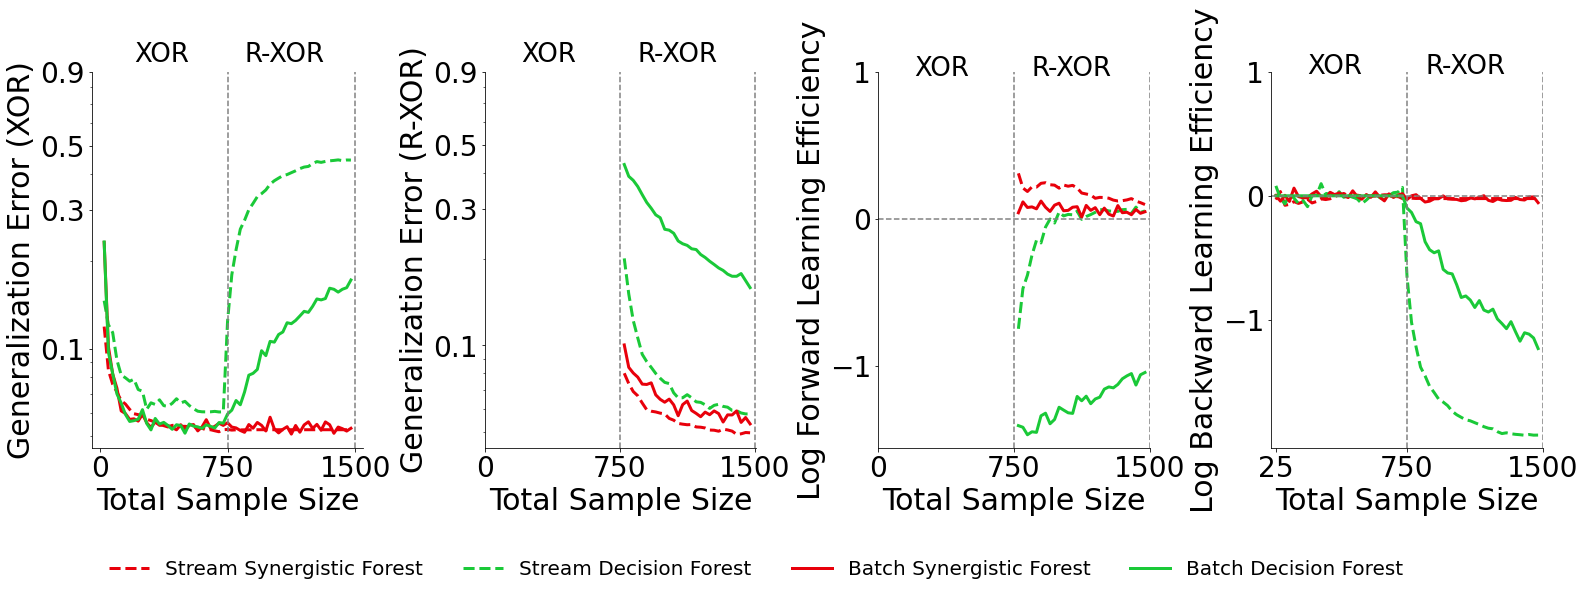

In [12]:
fn.plot_error(rxor_results, "R-XOR")

### Gaussian XNOR

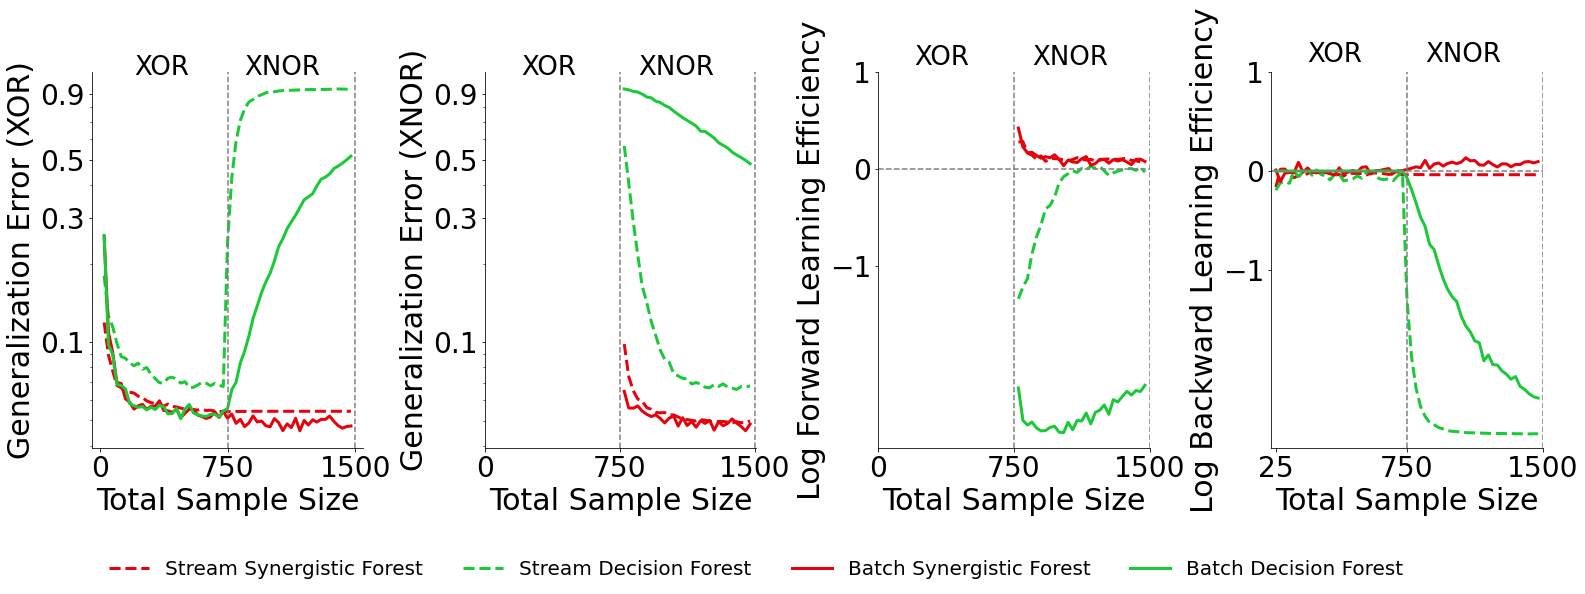

In [13]:
fn.plot_error(xnor_results, "XNOR")

## Spiral Experiments

In [1]:
from proglearn.sims import generate_spirals
from functions import streaming_spirals_functions as spirals

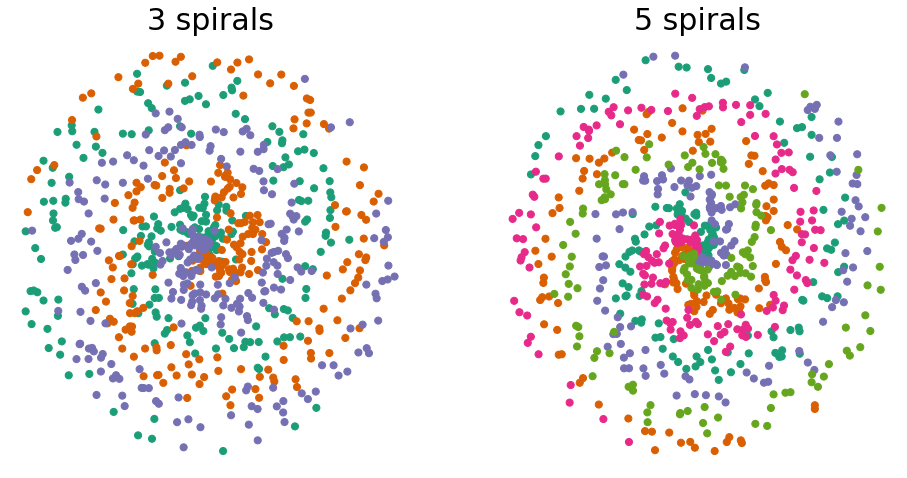

In [2]:
spiral3, y_3 = generate_spirals(750, 3, noise=0.8)
spiral5, y_5 = generate_spirals(750, 5, noise = 0.4)
spirals.plot_spirals(spiral3, y_3, 3, spiral5, y_5, 5)

In [ ]:
mc_rep = 10
spiral_results = spirals.run_spiral_experiments(mc_rep)

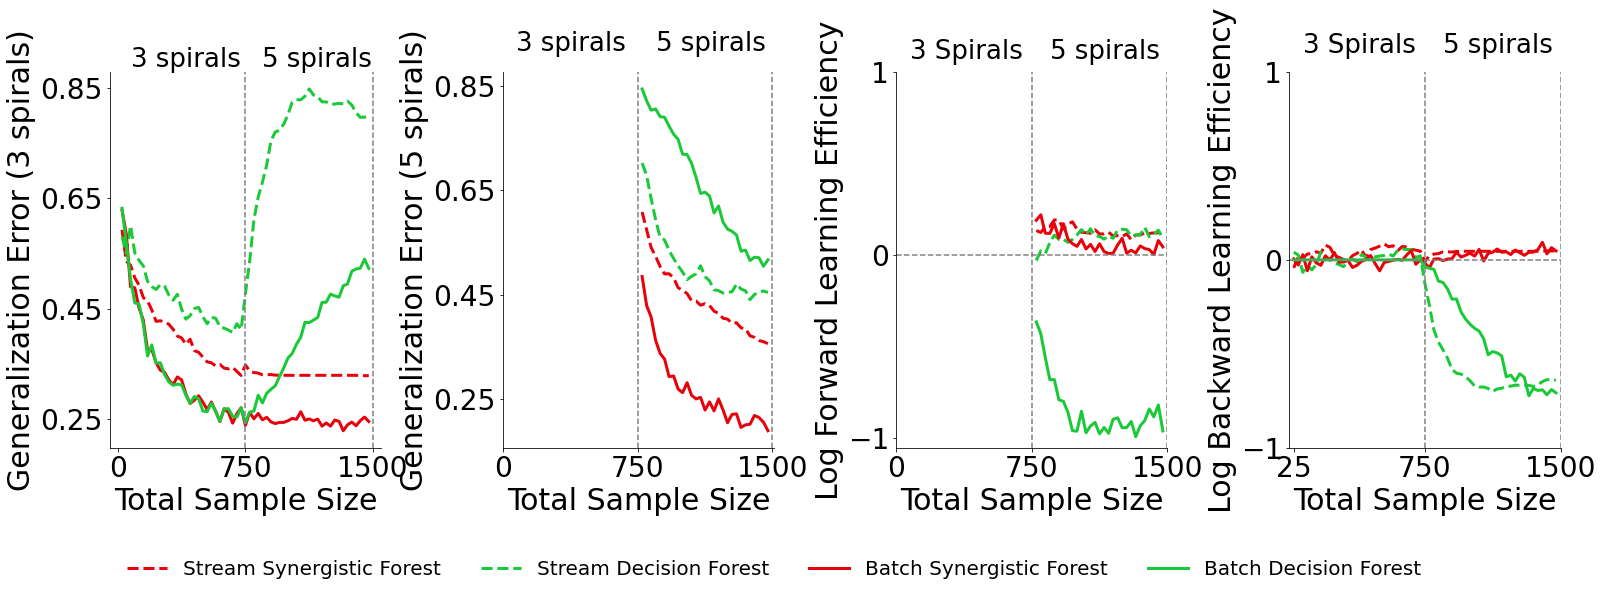

In [ ]:
spirals.plot_error(spiral_results)